<a href="https://colab.research.google.com/github/herysedra/ady_cov/blob/master/scr/tabilao/Tabilao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib
import pickle

import pymc3 as pm
import theano.tensor as tt
import theano
import datetime
import time


import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas.testing as tm


tilyvoa = pd.read_csv("/content/drive/My Drive/data/tilyvoa.csv")


tilyvoafar = tilyvoa.groupby('Faritra')
tilyvoamdg = tilyvoafar.get_group('Madagasikara')
tilyvoamdg.set_index('Daty', inplace=True)

tilyvoamdg.index = pd.to_datetime(tilyvoamdg.index)


tilyvoatana = tilyvoafar.get_group('Antananarivo')
tilyvoatana.set_index('Daty', inplace=True)

tilyvoatana.index = pd.to_datetime(tilyvoatana.index)

tilyvoatoa = tilyvoafar.get_group('Toamasina')
tilyvoatoa.set_index('Daty', inplace=True)

tilyvoatoa.index = pd.to_datetime(tilyvoatoa.index)


path_to_save = '/content/drive/My Drive/sary/'
path_data = '/content/drive/My Drive/data/'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

daty_data_manom = datetime.date(2020,6,16)
daty_data_mifar = datetime.date(2020,8,16)



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


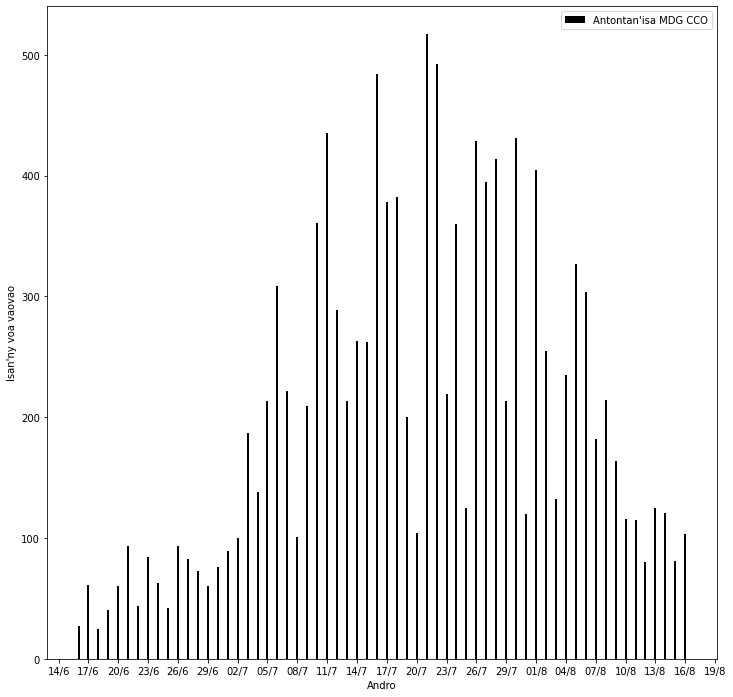

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width = 0.2, color='black',label="Antontan'isa MDG CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,540)
plt.savefig(path_to_save+'voavaozao.eps')
plt.savefig(path_to_save+'voavaozao.png')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


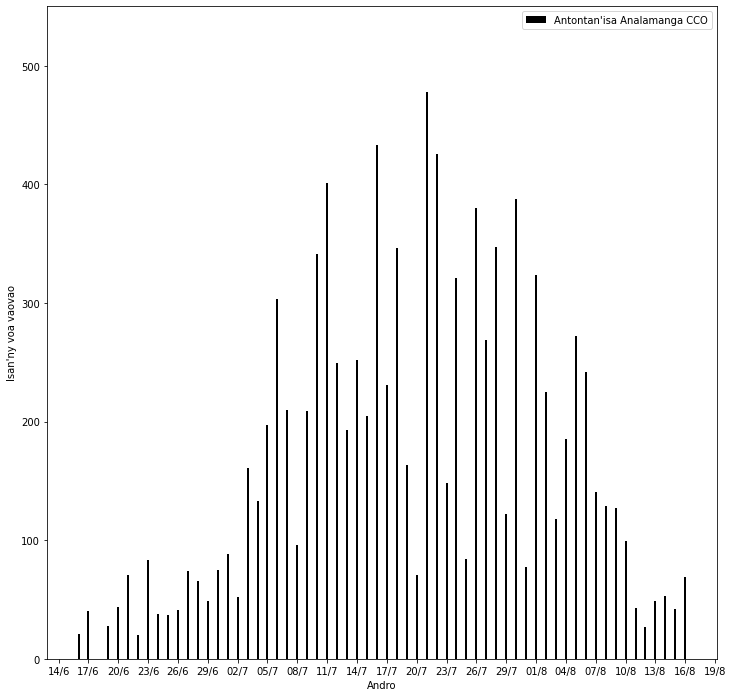

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatana.loc[daty_data_manom:daty_data_mifar].index, tilyvoatana.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Analamanga CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,550)
plt.savefig(path_to_save+'voavaotanazao.eps')
plt.savefig(path_to_save+'voavaotanazao.png')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


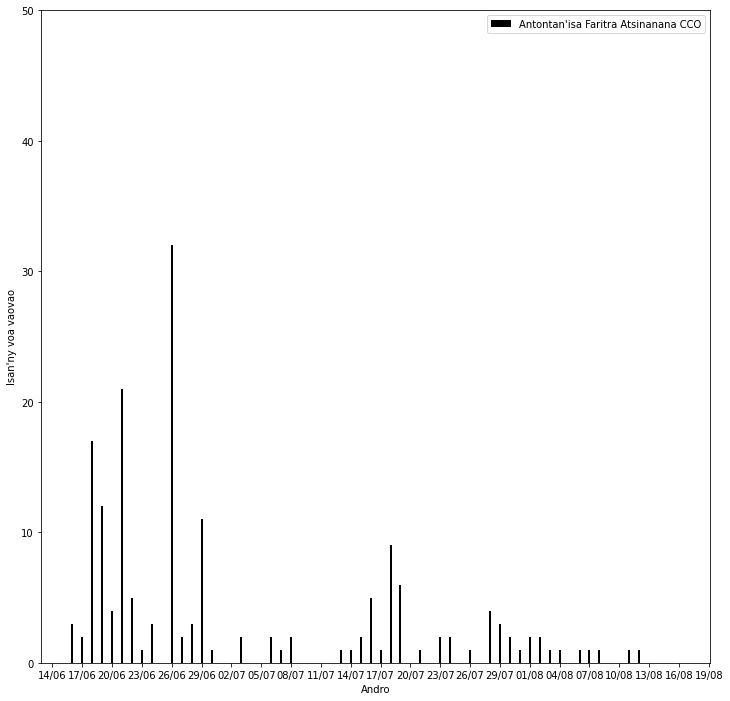

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoatoa.loc[daty_data_manom:daty_data_mifar].index, tilyvoatoa.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width=0.2, color='black',label="Antontan'isa Faritra Atsinanana CCO")


ax.set(xlabel ='Andro', ylabel = "Isan'ny voa vaovao")

date_form = DateFormatter("%d/%m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,50)
plt.savefig(path_to_save+'voavaotoazao.eps')
plt.savefig(path_to_save+'voavaotoazao.png')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


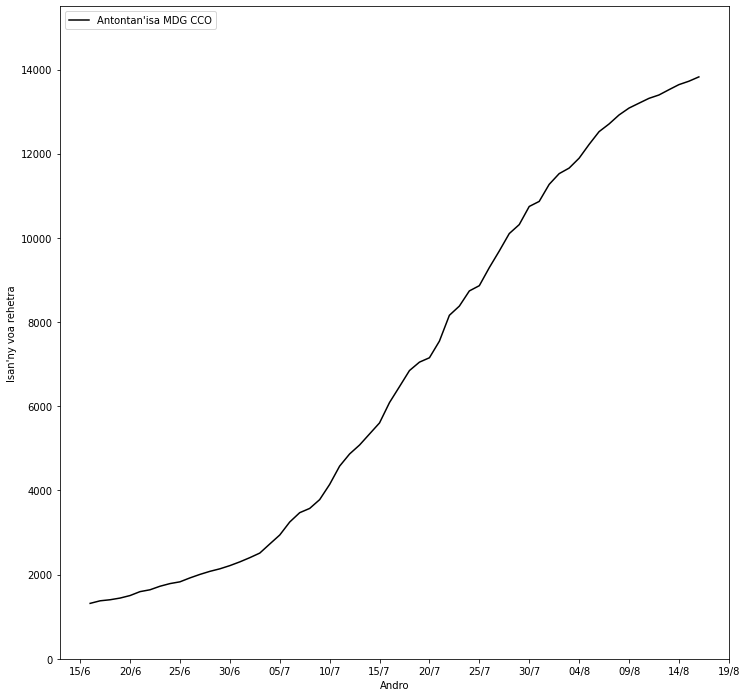

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voareh tvm'], color='black',label="Antontan'isa MDG CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny voa rehetra")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.legend(loc= 'upper left')

plt.ylim(0,15500)
plt.savefig(path_to_save+'voarehzao.eps')
plt.savefig(path_to_save+'voarehzao.png')

plt.show()

In [ ]:
tilyvoamdg.loc['Voareh tvm'].loc[datetime.date(2020,6,30)]

## Sitrana

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


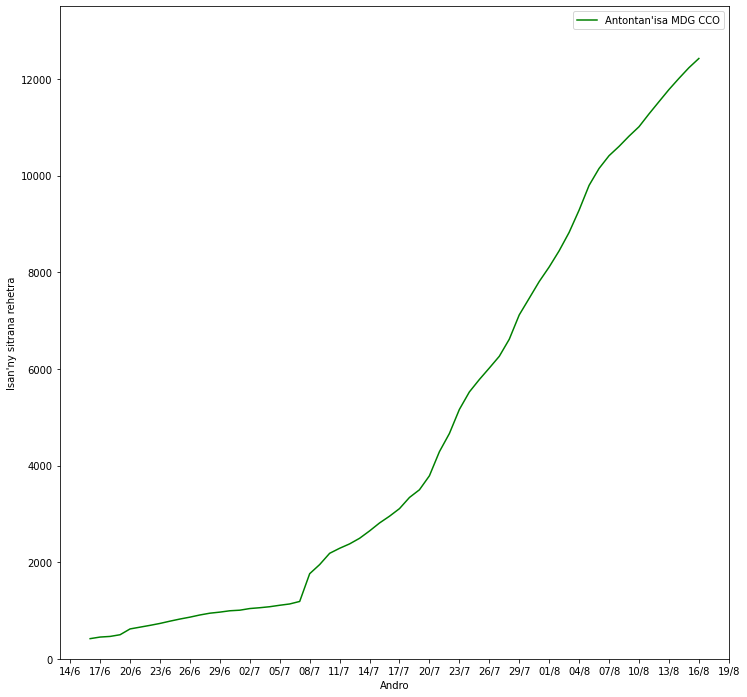

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar, 'Sitranreh tvm'], color='green',label="Antontan'isa MDG CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana rehetra")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,13500)
plt.savefig(path_to_save+'sitrrehzao.eps')
plt.savefig(path_to_save+'sitrrehzao.png')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


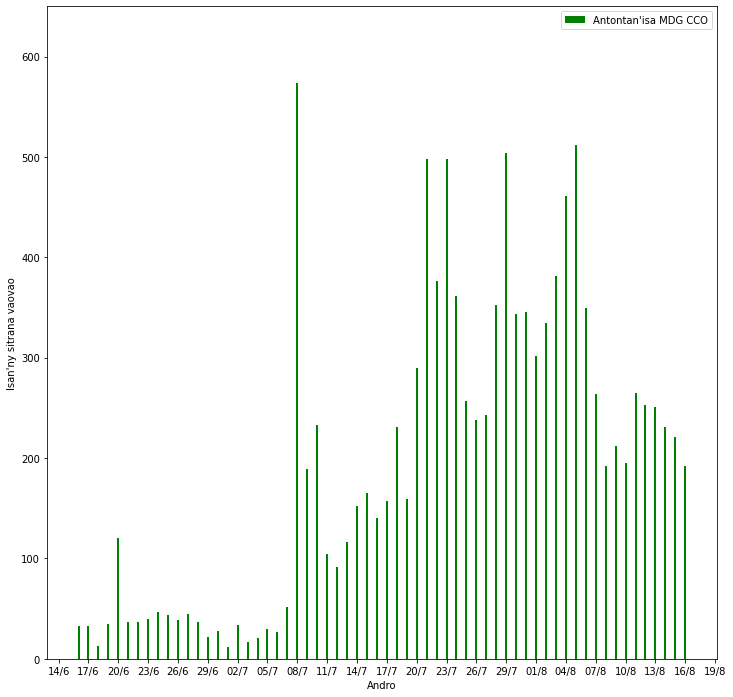

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Sitranvao tvm'], width=0.2, color='green',label="Antontan'isa MDG CCO")

ax.set(xlabel ='Andro', ylabel = "Isan'ny sitrana vaovao")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,650)
plt.savefig(path_to_save+'sitrvaozao.eps')

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


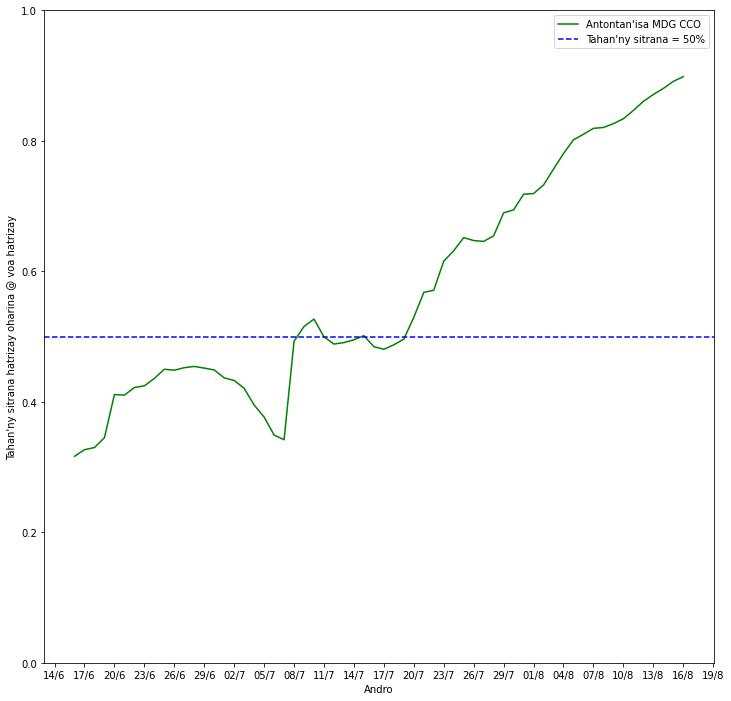

In [ ]:

fig, ax = plt.subplots(figsize=(12, 12))

ax.plot(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar ,'Tahasitr'], color='green',label="Antontan'isa MDG CCO")
ax.axhline(y=0.5, color='b', linestyle='dashed', label ="Tahan'ny sitrana = 50%")

ax.set(xlabel ='Andro', ylabel = "Tahan'ny sitrana hatrizay oharina @ voa hatrizay")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.ylim(0,1)
plt.savefig(path_to_save+'tahasitrzao.eps')
plt.savefig(path_to_save+'tahasitrzao.png')
plt.show()

# Tahan'ny sitrana

In [ ]:
# Mametraka ny marika 'tahabe' na 'tahakely' arakaraka ny tahan'ny sitrana

tilyvoamdg['Mombatahasitr'] = np.where(tilyvoamdg['Tahasitr']>=0.7, 'tahabe', 'tahakely')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
res = [tilyvoamdg['Tahasitr'][i + 1] - tilyvoamdg['Tahasitr'][i] for i in range(len(tilyvoamdg['Tahasitr'])-1)] 

In [ ]:
tilyvoamdg.loc[tilyvoamdg['Mombatahasitr'] == 'tahabe']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-04-29,FB-TVM,Madagasikara,NaN,NaN,NaN,3107.0,42.0,NaN,NaN,0.0,0.0,NaN,42.0,NaN,NaN,128.0,128.0,NaN,8.0,90.0,NaN,NaN,1.0000,0.7031,NaN,NaN,tahabe
2020-04-30,FB-TVM,Madagasikara,NaN,NaN,NaN,3228.0,121.0,NaN,NaN,0.0,0.0,NaN,121.0,NaN,NaN,128.0,128.0,NaN,2.0,92.0,NaN,NaN,1.0000,0.7188,NaN,NaN,tahabe
2020-05-01,FB-TVM,Madagasikara,NaN,NaN,NaN,3300.0,72.0,NaN,NaN,4.0,4.0,NaN,68.0,NaN,NaN,132.0,132.0,NaN,2.0,94.0,NaN,NaN,0.9444,0.7121,NaN,NaN,tahabe
2020-05-02,FB-TVM,Madagasikara,NaN,NaN,NaN,3393.0,93.0,NaN,NaN,3.0,3.0,NaN,90.0,NaN,NaN,135.0,135.0,NaN,3.0,97.0,NaN,NaN,0.9677,0.7185,NaN,NaN,tahabe
2020-07-31,FB-TVM,Madagasikara,NaN,2723.0,NaN,41194.0,525.0,525.0,NaN,120.0,120.0,NaN,405.0,NaN,NaN,10868.0,10868.0,NaN,346.0,7807.0,1.0,106.0,0.7714,0.7183,NaN,NaN,tahabe
2020-08-01,FB-TVM,Madagasikara,NaN,2829.0,NaN,42446.0,1358.0,1358.0,NaN,405.0,405.0,NaN,953.0,NaN,NaN,11273.0,11273.0,NaN,302.0,8109.0,1.0,107.0,0.7018,0.7193,NaN,NaN,tahabe
2020-08-02,FB-TVM,Madagasikara,NaN,2896.0,NaN,43435.0,1056.0,1056.0,NaN,255.0,255.0,NaN,801.0,NaN,NaN,11528.0,11528.0,NaN,335.0,8444.0,7.0,114.0,0.7585,0.7325,NaN,NaN,tahabe
2020-08-03,FB-TVM,Madagasikara,NaN,2918.0,NaN,44033.0,625.0,625.0,NaN,132.0,132.0,NaN,493.0,NaN,NaN,11660.0,11660.0,NaN,381.0,8825.0,4.0,118.0,0.7888,0.7569,NaN,NaN,tahabe
2020-08-04,FB-TVM,Madagasikara,NaN,3033.0,NaN,44805.0,887.0,887.0,NaN,235.0,235.0,NaN,652.0,NaN,NaN,11895.0,11895.0,NaN,461.0,9286.0,5.0,123.0,0.7351,0.7807,NaN,NaN,tahabe


In [ ]:
tilyvoamdg.loc[tilyvoamdg['Tahasitr'] == np.nanmax(tilyvoamdg['Tahasitr'])]

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-16,FB-TVM,Madagasikara,NaN,4562.0,NaN,52321.0,826.0,826.0,NaN,103.0,103.0,NaN,723.0,NaN,NaN,13827.0,13827.0,NaN,192.0,12424.0,4.0,170.0,0.8753,0.8985,NaN,NaN,tahabe


In [ ]:
tilyvoamdg.loc[tilyvoamdg['Mombatahasitr'] == 'tahakely']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-18,CCO,Madagasikara,NaN,NaN,NaN,NaN,36.0,36.0,0.0,0.0,NaN,36.0,36.0,36.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.0000,NaN,NaN,NaN,tahakely
2020-03-19,CCO,Madagasikara,NaN,NaN,NaN,NaN,48.0,48.0,3.0,3.0,NaN,45.0,45.0,43.0,3.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.9375,NaN,NaN,NaN,tahakely
2020-03-20,CCO,Madagasikara,NaN,NaN,NaN,NaN,127.0,127.0,2.0,2.0,NaN,125.0,125.0,127.0,5.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.9843,NaN,NaN,NaN,tahakely
2020-03-21,CCO,Madagasikara,NaN,NaN,NaN,NaN,69.0,69.0,10.0,10.0,NaN,59.0,59.0,69.0,15.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.8551,NaN,NaN,NaN,tahakely
2020-03-22,CCO,Madagasikara,NaN,NaN,NaN,NaN,125.0,125.0,1.0,1.0,NaN,124.0,124.0,125.0,16.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.9920,NaN,NaN,NaN,tahakely
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-26,FB-TVM,Madagasikara,NaN,NaN,NaN,37921.0,1009.0,NaN,NaN,429.0,429.0,NaN,580.0,NaN,NaN,9295.0,9295.0,NaN,238.0,6017.0,7.0,78.0,0.5748,0.6473,NaN,NaN,tahakely
2020-07-27,FB-TVM,Madagasikara,NaN,NaN,NaN,38587.0,886.0,886.0,NaN,395.0,395.0,NaN,491.0,NaN,NaN,9690.0,9690.0,NaN,243.0,6260.0,6.0,91.0,0.5542,0.6460,NaN,NaN,tahakely
2020-07-28,FB-TVM,Madagasikara,NaN,NaN,NaN,39415.0,985.0,985.0,NaN,414.0,414.0,NaN,571.0,NaN,NaN,10104.0,10104.0,NaN,353.0,6613.0,2.0,93.0,0.5797,0.6545,NaN,NaN,tahakely


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


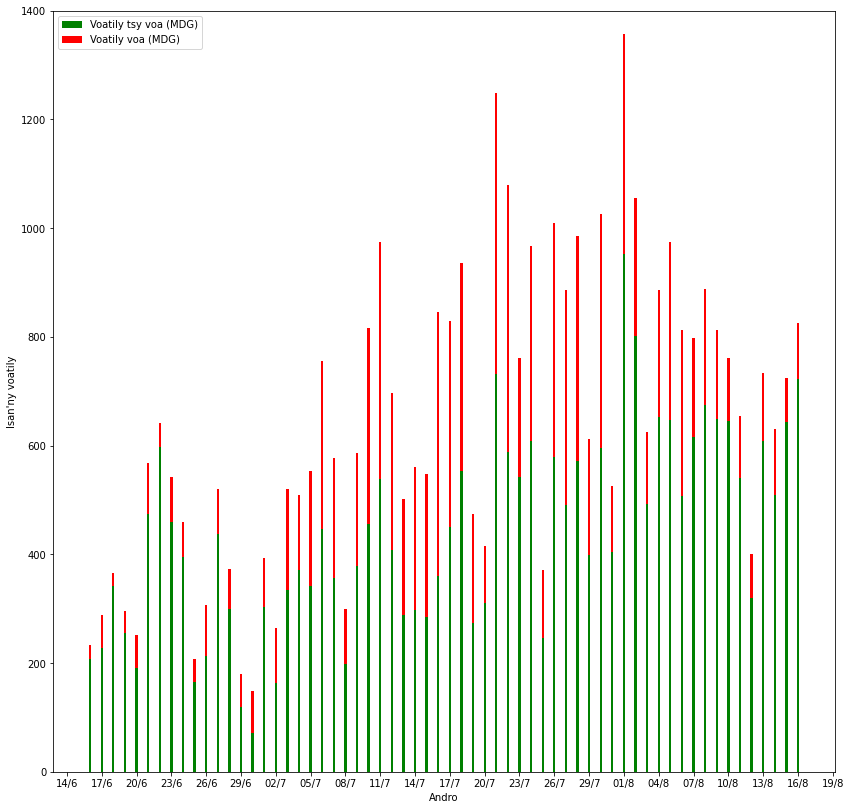

In [ ]:

fig, ax = plt.subplots(figsize=(14, 14))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Tsyvoatomb'], width= 0.2, color = 'green',label = 'Voatily tsy voa (MDG)')
ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Voatomb'], width= 0.2, bottom = tilyvoamdg.loc[daty_data_manom:daty_data_mifar,'Tsyvoatomb'], color = 'red', label = 'Voatily voa (MDG)')

ax.set(xlabel ='Andro', ylabel = "Isan'ny voatily")

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'upper left')

plt.ylim(0,1400)
plt.savefig(path_to_save+'mdgtahatv.eps')
plt.savefig(path_to_save+'mdgtahatv.png')

plt.show()

## Tahan'ireo voatily tsy voa

In [ ]:
tilyvoamdg.loc[datetime.date(2020,6,30), 'Tahatsv']

0.4865

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


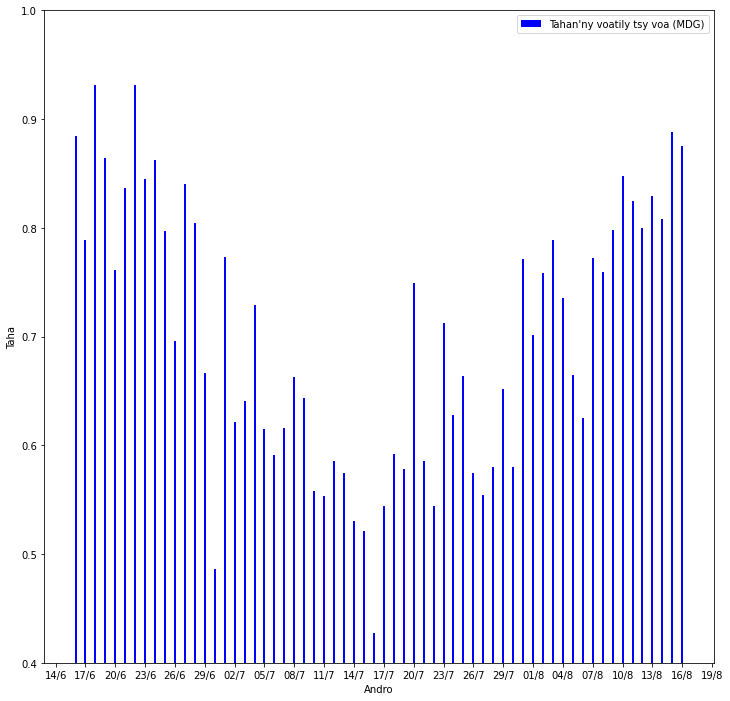

In [ ]:


fig, ax = plt.subplots(figsize=(12, 12))

ax.bar(tilyvoamdg.loc[daty_data_manom:daty_data_mifar].index, tilyvoamdg.loc[daty_data_manom:daty_data_mifar, 'Tahatsv'],  width= 0.2, color= 'blue', label = "Tahan'ny voatily tsy voa (MDG)")

              
ax.set(xlabel ='Andro', ylabel = "Taha")

plt.ylim(0.4,1)

date_form = DateFormatter("%d/%-m")
ax.xaxis.set_major_formatter(date_form)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))
ax.legend(loc= 'best')

plt.savefig(path_to_save+'mdgtahatsv.eps')
plt.savefig(path_to_save+'mdgtahatsv.png')
plt.show()

In [ ]:
tilyvoamdg['Mombatahatsv'] = np.where(tilyvoamdg['Tahatsv']>=0.6, 'tahabe', 'tahakely')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tilyvoamdg.loc[tilyvoamdg['Mombatahatsv'] == 'tahabe']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr,Mombatahatsv
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-03-18,CCO,Madagasikara,NaN,NaN,NaN,NaN,36.0,36.0,0.0,0.0,NaN,36.0,36.0,36.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,1.0000,NaN,NaN,NaN,tahakely,tahabe
2020-03-19,CCO,Madagasikara,NaN,NaN,NaN,NaN,48.0,48.0,3.0,3.0,NaN,45.0,45.0,43.0,3.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.9375,NaN,NaN,NaN,tahakely,tahabe
2020-03-20,CCO,Madagasikara,NaN,NaN,NaN,NaN,127.0,127.0,2.0,2.0,NaN,125.0,125.0,127.0,5.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.9843,NaN,NaN,NaN,tahakely,tahabe
2020-03-21,CCO,Madagasikara,NaN,NaN,NaN,NaN,69.0,69.0,10.0,10.0,NaN,59.0,59.0,69.0,15.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.8551,NaN,NaN,NaN,tahakely,tahabe
2020-03-22,CCO,Madagasikara,NaN,NaN,NaN,NaN,125.0,125.0,1.0,1.0,NaN,124.0,124.0,125.0,16.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0.9920,NaN,NaN,NaN,tahakely,tahabe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-12,FB-TVM,Madagasikara,NaN,3982.0,NaN,49957.0,400.0,400.0,NaN,80.0,80.0,NaN,320.0,NaN,NaN,13397.0,13397.0,NaN,253.0,11529.0,4.0,156.0,0.8000,0.8606,NaN,NaN,tahabe,tahabe
2020-08-13,FB-TVM,Madagasikara,NaN,4179.0,NaN,50493.0,733.0,733.0,NaN,125.0,125.0,NaN,608.0,NaN,NaN,13522.0,13522.0,NaN,251.0,11780.0,6.0,162.0,0.8295,0.8712,NaN,NaN,tahabe,tahabe
2020-08-14,FB-TVM,Madagasikara,NaN,4333.0,NaN,50969.0,630.0,630.0,NaN,121.0,121.0,NaN,509.0,NaN,NaN,13643.0,13643.0,NaN,231.0,12011.0,2.0,164.0,0.8079,0.8804,NaN,NaN,tahabe,tahabe


In [ ]:
tilyvoamdg.loc[daty_data_manom:daty_data_mifar].loc[tilyvoamdg['Mombatahatsv'] == 'tahabe']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr,Mombatahatsv
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-16,FB-TVM,Madagasikara,"1.33 (1317, 27)",NaN,NaN,16093.0,234.0,234.0,NaN,27.0,27.0,NaN,207.0,NaN,NaN,1317.0,1317.0,NaN,33.0,417.0,2.0,12.0,0.8846,0.3166,1.33,0.93-1.72,tahakely,tahabe
2020-06-17,FB-TVM,Madagasikara,NaN,NaN,NaN,16402.0,289.0,289.0,NaN,61.0,61.0,NaN,228.0,NaN,NaN,1378.0,1378.0,NaN,33.0,450.0,0.0,12.0,0.7889,0.3266,NaN,NaN,tahakely,tahabe
2020-06-18,FB-TVM,Madagasikara,"1.41 (1403, 25)",NaN,NaN,16653.0,366.0,366.0,NaN,25.0,25.0,NaN,341.0,NaN,NaN,1403.0,1403.0,NaN,13.0,463.0,1.0,13.0,0.9317,0.3300,1.41,1.06-1.81,tahakely,tahabe
2020-06-19,FB-TVM,Madagasikara,NaN,NaN,NaN,17095.0,295.0,295.0,NaN,40.0,40.0,NaN,255.0,NaN,NaN,1443.0,1443.0,NaN,35.0,498.0,0.0,13.0,0.8644,0.3451,NaN,NaN,tahakely,tahabe
2020-06-20,FB-TVM,Madagasikara,"1.26 (1503, 60)",NaN,NaN,17520.0,251.0,251.0,NaN,60.0,60.0,NaN,191.0,NaN,NaN,1503.0,1503.0,NaN,120.0,618.0,0.0,13.0,0.7610,0.4112,1.26,0.96-1.62,tahakely,tahabe
2020-06-21,FB-TVM,Madagasikara,NaN,NaN,NaN,18119.0,568.0,568.0,NaN,93.0,93.0,NaN,475.0,NaN,NaN,1596.0,1596.0,NaN,37.0,655.0,1.0,14.0,0.8363,0.4104,NaN,NaN,tahakely,tahabe
2020-06-22,FB-TVM,Madagasikara,"1.45 (1640, 44)",NaN,NaN,18741.0,642.0,642.0,NaN,44.0,44.0,NaN,598.0,NaN,NaN,1640.0,1640.0,NaN,37.0,692.0,1.0,15.0,0.9315,0.4220,1.45,1.17-1.76,tahakely,tahabe
2020-06-23,FB-TVM,Madagasikara,NaN,NaN,NaN,19027.0,543.0,543.0,NaN,84.0,84.0,NaN,459.0,NaN,NaN,1724.0,1724.0,NaN,40.0,732.0,0.0,15.0,0.8453,0.4246,NaN,NaN,tahakely,tahabe
2020-06-24,FB-TVM,Madagasikara,NaN,NaN,NaN,19392.0,459.0,459.0,NaN,63.0,63.0,NaN,396.0,NaN,NaN,1787.0,1787.0,NaN,47.0,779.0,1.0,16.0,0.8627,0.4359,NaN,NaN,tahakely,tahabe


In [ ]:
tilyvoamdg.loc[tilyvoamdg['Mombatahatsv'] == 'tahakely']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr,Mombatahatsv
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-05-12,FB-TVM,Madagasikara,NaN,NaN,NaN,5760.0,NaN,NaN,NaN,6.0,6.0,NaN,-6.0,NaN,NaN,192.0,192.0,NaN,0.0,105.0,NaN,NaN,NaN,0.5469,NaN,NaN,tahakely,tahakely
2020-05-13,FB-TVM,Madagasikara,NaN,NaN,NaN,5760.0,NaN,NaN,NaN,20.0,20.0,NaN,-20.0,NaN,NaN,212.0,212.0,NaN,2.0,107.0,NaN,NaN,NaN,0.5047,NaN,NaN,tahakely,tahakely
2020-05-14,FB-TVM,Madagasikara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,18.0,NaN,-18.0,NaN,NaN,230.0,230.0,NaN,1.0,108.0,NaN,NaN,NaN,0.4696,NaN,NaN,tahakely,tahakely
2020-06-30,FB-TVM,Madagasikara,NaN,NaN,NaN,21696.0,148.0,148.0,NaN,76.0,76.0,NaN,72.0,NaN,NaN,2214.0,2214.0,NaN,28.0,994.0,0.0,20.0,0.4865,0.4490,NaN,NaN,tahakely,tahakely
2020-07-06,FB-TVM,Madagasikara,"1.49 95%CI (1.3-1.75) (3250, 522; 33, 4)",NaN,NaN,25286.0,756.0,756.0,NaN,309.0,309.0,NaN,447.0,NaN,NaN,3250.0,3250.0,NaN,27.0,1135.0,1.0,33.0,0.5913,0.3492,NaN,NaN,tahakely,tahakely
2020-07-10,FB-TVM,Madagasikara,"1.31 95% CI (1.16-1.43) (4143, 363)",NaN,NaN,27504.0,816.0,816.0,NaN,361.0,361.0,NaN,455.0,NaN,NaN,4143.0,4143.0,NaN,233.0,2183.0,1.0,34.0,0.5576,0.5269,NaN,NaN,tahakely,tahakely
2020-07-11,FB-TVM,Madagasikara,NaN,NaN,NaN,28388.0,974.0,974.0,NaN,435.0,435.0,NaN,539.0,NaN,NaN,4578.0,4578.0,NaN,104.0,2287.0,0.0,34.0,0.5534,0.4996,NaN,NaN,tahakely,tahakely
2020-07-12,FB-TVM,Madagasikara,NaN,NaN,NaN,29053.0,697.0,697.0,NaN,289.0,289.0,NaN,408.0,NaN,NaN,4867.0,4867.0,NaN,91.0,2378.0,1.0,35.0,0.5854,0.4886,NaN,NaN,tahakely,tahakely
2020-07-13,FB-TVM,Madagasikara,"1.3 95% CI (1.16-1.45) (5080, 213)",NaN,NaN,29539.0,501.0,501.0,NaN,213.0,213.0,NaN,288.0,NaN,NaN,5080.0,5080.0,NaN,116.0,2494.0,2.0,37.0,0.5749,0.4909,NaN,NaN,tahakely,tahakely


In [ ]:
tilyvoamdg.loc[daty_data_manom:daty_data_mifar].loc[tilyvoamdg['Mombatahatsv'] == 'tahakely']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr,Mombatahatsv
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-30,FB-TVM,Madagasikara,NaN,NaN,NaN,21696.0,148.0,148.0,NaN,76.0,76.0,NaN,72.0,NaN,NaN,2214.0,2214.0,NaN,28.0,994.0,0.0,20.0,0.4865,0.4490,NaN,NaN,tahakely,tahakely
2020-07-06,FB-TVM,Madagasikara,"1.49 95%CI (1.3-1.75) (3250, 522; 33, 4)",NaN,NaN,25286.0,756.0,756.0,NaN,309.0,309.0,NaN,447.0,NaN,NaN,3250.0,3250.0,NaN,27.0,1135.0,1.0,33.0,0.5913,0.3492,NaN,NaN,tahakely,tahakely
2020-07-10,FB-TVM,Madagasikara,"1.31 95% CI (1.16-1.43) (4143, 363)",NaN,NaN,27504.0,816.0,816.0,NaN,361.0,361.0,NaN,455.0,NaN,NaN,4143.0,4143.0,NaN,233.0,2183.0,1.0,34.0,0.5576,0.5269,NaN,NaN,tahakely,tahakely
2020-07-11,FB-TVM,Madagasikara,NaN,NaN,NaN,28388.0,974.0,974.0,NaN,435.0,435.0,NaN,539.0,NaN,NaN,4578.0,4578.0,NaN,104.0,2287.0,0.0,34.0,0.5534,0.4996,NaN,NaN,tahakely,tahakely
2020-07-12,FB-TVM,Madagasikara,NaN,NaN,NaN,29053.0,697.0,697.0,NaN,289.0,289.0,NaN,408.0,NaN,NaN,4867.0,4867.0,NaN,91.0,2378.0,1.0,35.0,0.5854,0.4886,NaN,NaN,tahakely,tahakely
2020-07-13,FB-TVM,Madagasikara,"1.3 95% CI (1.16-1.45) (5080, 213)",NaN,NaN,29539.0,501.0,501.0,NaN,213.0,213.0,NaN,288.0,NaN,NaN,5080.0,5080.0,NaN,116.0,2494.0,2.0,37.0,0.5749,0.4909,NaN,NaN,tahakely,tahakely
2020-07-14,FB-TVM,Madagasikara,"1.32 95%CI (1.18-1.47) (5343, 263; 39, 2)",NaN,,30100.0,560.0,560.0,NaN,263.0,263.0,NaN,297.0,NaN,NaN,5343.0,5343.0,NaN,152.0,2646.0,2.0,39.0,0.5304,0.4952,NaN,NaN,tahakely,tahakely
2020-07-15,FB-TVM,Madagasikara,NaN,NaN,NaN,30530.0,547.0,547.0,NaN,262.0,262.0,NaN,285.0,NaN,NaN,5605.0,5605.0,NaN,165.0,2811.0,4.0,43.0,0.5210,0.5015,NaN,NaN,tahakely,tahakely
2020-07-16,FB-TVM,Madagasikara,NaN,NaN,NaN,31296.0,845.0,845.0,NaN,484.0,484.0,NaN,361.0,NaN,NaN,6089.0,6089.0,NaN,140.0,2951.0,10.0,53.0,0.4272,0.4846,NaN,NaN,tahakely,tahakely


In [ ]:
tilyvoamdg['Mombatily'] = np.where(tilyvoamdg['Tilyvoatomb']>=600, 'tilybe', 'tilykely')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tilyvoamdg.loc[daty_data_manom:daty_data_mifar].loc[tilyvoamdg['Mombatily'] == 'tilykely']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr,Mombatahatsv,Mombatily
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-16,FB-TVM,Madagasikara,"1.33 (1317, 27)",NaN,NaN,16093.0,234.0,234.0,NaN,27.0,27.0,NaN,207.0,NaN,NaN,1317.0,1317.0,NaN,33.0,417.0,2.0,12.0,0.8846,0.3166,1.33,0.93-1.72,tahakely,tahabe,tilykely
2020-06-17,FB-TVM,Madagasikara,NaN,NaN,NaN,16402.0,289.0,289.0,NaN,61.0,61.0,NaN,228.0,NaN,NaN,1378.0,1378.0,NaN,33.0,450.0,0.0,12.0,0.7889,0.3266,NaN,NaN,tahakely,tahabe,tilykely
2020-06-18,FB-TVM,Madagasikara,"1.41 (1403, 25)",NaN,NaN,16653.0,366.0,366.0,NaN,25.0,25.0,NaN,341.0,NaN,NaN,1403.0,1403.0,NaN,13.0,463.0,1.0,13.0,0.9317,0.3300,1.41,1.06-1.81,tahakely,tahabe,tilykely
2020-06-19,FB-TVM,Madagasikara,NaN,NaN,NaN,17095.0,295.0,295.0,NaN,40.0,40.0,NaN,255.0,NaN,NaN,1443.0,1443.0,NaN,35.0,498.0,0.0,13.0,0.8644,0.3451,NaN,NaN,tahakely,tahabe,tilykely
2020-06-20,FB-TVM,Madagasikara,"1.26 (1503, 60)",NaN,NaN,17520.0,251.0,251.0,NaN,60.0,60.0,NaN,191.0,NaN,NaN,1503.0,1503.0,NaN,120.0,618.0,0.0,13.0,0.7610,0.4112,1.26,0.96-1.62,tahakely,tahabe,tilykely
2020-06-21,FB-TVM,Madagasikara,NaN,NaN,NaN,18119.0,568.0,568.0,NaN,93.0,93.0,NaN,475.0,NaN,NaN,1596.0,1596.0,NaN,37.0,655.0,1.0,14.0,0.8363,0.4104,NaN,NaN,tahakely,tahabe,tilykely
2020-06-23,FB-TVM,Madagasikara,NaN,NaN,NaN,19027.0,543.0,543.0,NaN,84.0,84.0,NaN,459.0,NaN,NaN,1724.0,1724.0,NaN,40.0,732.0,0.0,15.0,0.8453,0.4246,NaN,NaN,tahakely,tahabe,tilykely
2020-06-24,FB-TVM,Madagasikara,NaN,NaN,NaN,19392.0,459.0,459.0,NaN,63.0,63.0,NaN,396.0,NaN,NaN,1787.0,1787.0,NaN,47.0,779.0,1.0,16.0,0.8627,0.4359,NaN,NaN,tahakely,tahabe,tilykely
2020-06-25,FB-TVM,Madagasikara,"1.89 (1829, 42)",NaN,NaN,19757.0,207.0,207.0,NaN,42.0,42.0,NaN,165.0,NaN,NaN,1829.0,1829.0,NaN,44.0,823.0,0.0,16.0,0.7971,0.4500,1.89,1.67-2.26,tahakely,tahabe,tilykely


In [ ]:
tilyvoamdg.loc[daty_data_manom:daty_data_mifar].loc[tilyvoamdg['Mombatily'] == 'tilybe']

,Loharano,Faritra,MRC Rt,Tily Genexpert,Tily ara-potoana,Tilytot tvm,Tilyvoatomb,Tily,Voa,Voatomb,Voavao tvm,Tsyvoa,Tsyvoatomb,Tilym,Voareh ilain,Voareh tomb,Voareh tvm,Sitranreh ilain,Sitranvao tvm,Sitranreh tvm,Nodimandry vao,Nodimandry reh,Tahatsv,Tahasitr,MRC Rt.1,Unnamed: 26,Mombatahasitr,Mombatahatsv,Mombatily
Daty,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-06-22,FB-TVM,Madagasikara,"1.45 (1640, 44)",NaN,NaN,18741.0,642.0,642.0,NaN,44.0,44.0,NaN,598.0,NaN,NaN,1640.0,1640.0,NaN,37.0,692.0,1.0,15.0,0.9315,0.4220,1.45,1.17-1.76,tahakely,tahabe,tilybe
2020-07-06,FB-TVM,Madagasikara,"1.49 95%CI (1.3-1.75) (3250, 522; 33, 4)",NaN,NaN,25286.0,756.0,756.0,NaN,309.0,309.0,NaN,447.0,NaN,NaN,3250.0,3250.0,NaN,27.0,1135.0,1.0,33.0,0.5913,0.3492,NaN,NaN,tahakely,tahakely,tilybe
2020-07-10,FB-TVM,Madagasikara,"1.31 95% CI (1.16-1.43) (4143, 363)",NaN,NaN,27504.0,816.0,816.0,NaN,361.0,361.0,NaN,455.0,NaN,NaN,4143.0,4143.0,NaN,233.0,2183.0,1.0,34.0,0.5576,0.5269,NaN,NaN,tahakely,tahakely,tilybe
2020-07-11,FB-TVM,Madagasikara,NaN,NaN,NaN,28388.0,974.0,974.0,NaN,435.0,435.0,NaN,539.0,NaN,NaN,4578.0,4578.0,NaN,104.0,2287.0,0.0,34.0,0.5534,0.4996,NaN,NaN,tahakely,tahakely,tilybe
2020-07-12,FB-TVM,Madagasikara,NaN,NaN,NaN,29053.0,697.0,697.0,NaN,289.0,289.0,NaN,408.0,NaN,NaN,4867.0,4867.0,NaN,91.0,2378.0,1.0,35.0,0.5854,0.4886,NaN,NaN,tahakely,tahakely,tilybe
2020-07-16,FB-TVM,Madagasikara,NaN,NaN,NaN,31296.0,845.0,845.0,NaN,484.0,484.0,NaN,361.0,NaN,NaN,6089.0,6089.0,NaN,140.0,2951.0,10.0,53.0,0.4272,0.4846,NaN,NaN,tahakely,tahakely,tilybe
2020-07-17,FB-TVM,Madagasikara,"1.45 95% CI (1.3-1.63) (6467, 378; 54, 1)",NaN,NaN,31774.0,829.0,829.0,NaN,378.0,378.0,NaN,451.0,NaN,NaN,6467.0,6467.0,NaN,157.0,3108.0,1.0,54.0,0.5440,0.4806,NaN,NaN,tahakely,tahakely,tilybe
2020-07-18,FB-TVM,Madagasikara,NaN,NaN,NaN,32491.0,936.0,936.0,NaN,382.0,382.0,NaN,554.0,NaN,NaN,6849.0,6849.0,NaN,231.0,3339.0,1.0,55.0,0.5919,0.4875,NaN,NaN,tahakely,tahakely,tilybe
2020-07-21,FB-TVM,Madagasikara,NaN,NaN,NaN,33943.0,1248.0,NaN,NaN,517.0,NaN,NaN,731.0,NaN,NaN,7548.0,7548.0,NaN,498.0,4286.0,3.0,65.0,0.5857,0.5678,NaN,NaN,tahakely,tahakely,tilybe
